## Dataset description

The dataset used in this project is the Medical transcription dataset. It contains sample medical transcriptions for various medical specialties.

The data is in CSV format with below features:

- **description**

- **medical_specialty**

- **sample_name**

- **transcription**

- **keywords**

## Information

Medical transcriptions are textual records of patient-doctor interactions, medical procedures, clinical findings, and more. Extracting keywords from these transcriptions can provide valuable insights into a patient's health status, medical history, and treatment plans.

* Significance:

  - Data Summarization: Keyword extraction helps in summarizing lengthy medical transcriptions, making it easier for healthcare professionals to quickly understand the patient's medical history.

  - Search and Retrieval: Extracted keywords can be used to index medical records, facilitating faster search and retrieval of relevant documents.

  - Trend Analysis: By analyzing frequently occurring keywords, healthcare institutions can identify common ailments, treatment outcomes, and more.

* Applications:

  - Clinical Decision Support: Extracted keywords can be used to develop clinical decision support systems that provide real-time suggestions to healthcare professionals.
  - Patient Monitoring: By continuously analyzing the keywords from a patient's medical transcriptions, healthcare systems can monitor the patient's health and predict potential health risks.
  - Research: Medical researchers can use extracted keywords to identify trends, study disease outbreaks, and understand treatment efficacies.
  - Billing and Insurance: Keywords can help in automating the medical coding process, which is essential for billing and insurance claims.

### Problem Statement

Build a transformer model for performing keywords extraction on the medical transcription dataset.



### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import re
import random
import string
from string import digits
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer, tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Load the dataset

read_data = pd.read_csv("/content/Medical_transcription_dataset.csv")
read_data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tr...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. He exercises three times a week at...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic,..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC today. He is a very pleasant gentleman who is 42 years old, 344 pounds. He is 5'9"". He has a BMI of 51. He has been overweight for ten years since...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement with left atrial diameter of 4.7 cm.,2. Normal size right and left ventricle.,3. Normal LV systolic function with left ventricular ejection fraction of...","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall thickness appear normal. The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. ...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."


### Pre-processing and EDA

In [ ]:

df = read_data.copy()
df = df.drop(columns=["Unnamed: 0"])
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female presents with complaint of allergies. She used to have allergies when she lived in Seattle but she thinks they are worse here. In the past, she has tr...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. He exercises three times a week at...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic,..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC today. He is a very pleasant gentleman who is 42 years old, 344 pounds. He is 5'9"". He has a BMI of 51. He has been overweight for ten years since...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement with left atrial diameter of 4.7 cm.,2. Normal size right and left ventricle.,3. Normal LV systolic function with left ventricular ejection fraction of...","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall thickness appear normal. The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. ...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."


- **Handle missing values**

In [ ]:
# Drop missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3898 entries, 0 to 4995
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        3898 non-null   object
 1   medical_specialty  3898 non-null   object
 2   sample_name        3898 non-null   object
 3   transcription      3898 non-null   object
 4   keywords           3898 non-null   object
dtypes: object(5)
memory usage: 182.7+ KB


In [ ]:
# Count of rows where keywords are ' '

for col in df.columns:
  df = df[df[col].str.strip()!=""]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3813 entries, 0 to 4995
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        3813 non-null   object
 1   medical_specialty  3813 non-null   object
 2   sample_name        3813 non-null   object
 3   transcription      3813 non-null   object
 4   keywords           3813 non-null   object
dtypes: object(5)
memory usage: 178.7+ KB


In [ ]:
# Displaying the distinct categories of medical specialty

speciality = df.medical_specialty.unique()
speciality

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Dentistry', ' Urology',
       ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Neurology', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic'], dtype=object)

In [ ]:
# Total categories

len(speciality)

39

In [ ]:
# Displaying the distinct categories of medical specialty and the number of records belonging to each category

spc = df.groupby('medical_specialty')["description"].count().reset_index()
spc = spc.rename(columns={"medical_specialty":"Specialty", "description": "Count"})
spc = spc.sort_values(by="Count", ascending=False).reset_index(drop=True)
spc

,Specialty,Count
0,Surgery,1007
1,Orthopedic,296
2,Cardiovascular / Pulmonary,276
3,Radiology,248
4,Consult - History and Phy.,219
5,Gastroenterology,192
6,Neurology,162
7,SOAP / Chart / Progress Notes,140
8,Urology,139
9,General Medicine,137


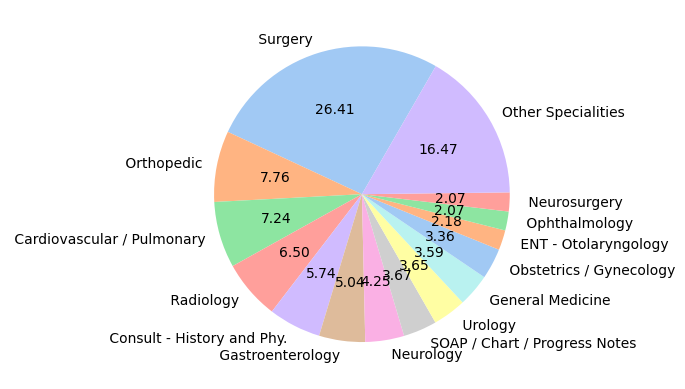

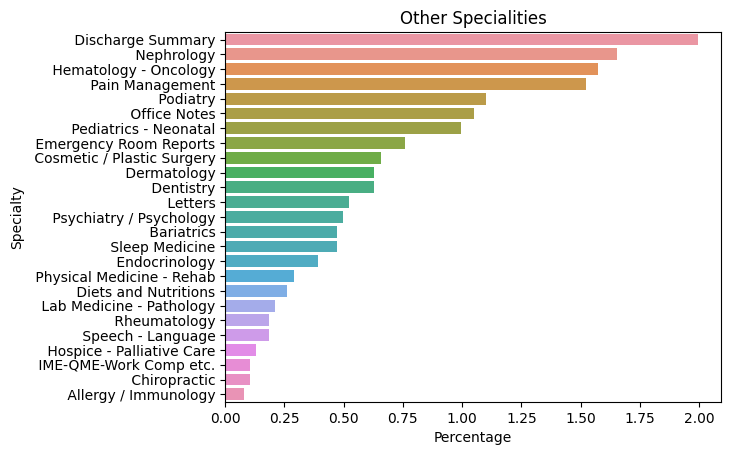

In [ ]:

top_cnt = 14
top_spc = spc[:top_cnt].copy()
remaining = spc[top_cnt:]["Count"].sum()
new_record = pd.DataFrame([{'Specialty':'Other Specialities', 'Count':remaining}])
top_spc= pd.concat([top_spc, new_record], ignore_index=True)

colors = sns.color_palette('pastel')[0:top_cnt+1]

#create pie chart
plt.pie(top_spc.Count, labels = top_spc.Specialty, colors = colors, autopct='%.2f', startangle=60)
plt.show()

rem_spc = spc[top_cnt:].copy()
rem_spc["Percentage"] = rem_spc.Count*100/spc.Count.sum()
sns.barplot(data=rem_spc, y="Specialty", x="Percentage")
plt.title("Other Specialities")
plt.show()

### Pre-process `transcription` and `keywords` text



In [ ]:
# Convert transcription and keywords text to lowercase

df.transcription = df.transcription.str.lower()
df.keywords = df.keywords.str.lower()
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"subjective:, this 23-year-old white female presents with complaint of allergies. she used to have allergies when she lived in seattle but she thinks they are worse here. in the past, she has tr...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"past medical history:, he has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. he exercises three times a week at...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkin's diet, weight watcher's, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic,..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc today. he is a very pleasant gentleman who is 42 years old, 344 pounds. he is 5'9"". he has a bmi of 51. he has been overweight for ten years since...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode: , ,1. left atrial enlargement with left atrial diameter of 4.7 cm.,2. normal size right and left ventricle.,3. normal lv systolic function with left ventricular ejection fraction of...","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. the left ventricular cavity size and wall thickness appear normal. the wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. ...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."


In [ ]:
# Remove quotes from transcription and keywords text

df.transcription = df.transcription.str.replace('"', '').str.replace("'", "").str.replace("`", "")
df.keywords = df.keywords.str.replace('"', '').str.replace("'", "").str.replace("`", "")
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,"subjective:, this 23-year-old white female presents with complaint of allergies. she used to have allergies when she lived in seattle but she thinks they are worse here. in the past, she has tr...","allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,"
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"past medical history:, he has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor. he exercises three times a week at...","bariatrics, laparoscopic gastric bypass, weight loss programs, gastric bypass, atkins diet, weight watchers, body weight, laparoscopic gastric, weight loss, pounds, months, weight, laparoscopic, b..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc today. he is a very pleasant gentleman who is 42 years old, 344 pounds. he is 59. he has a bmi of 51. he has been overweight for ten years since t...","bariatrics, laparoscopic gastric bypass, heart attacks, body weight, pulmonary embolism, potential complications, sleep study, weight loss, gastric bypass, anastomosis, loss, sleep, laparoscopic, ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode: , ,1. left atrial enlargement with left atrial diameter of 4.7 cm.,2. normal size right and left ventricle.,3. normal lv systolic function with left ventricular ejection fraction of...","cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. the left ventricular cavity size and wall thickness appear normal. the wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%. ...,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation..."


In [ ]:
# Remove punctuations

df.transcription = df.transcription.str.replace('[^\w\s]','')
df.keywords = df.keywords.str.replace('[^\w\s]','')
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,subjective this 23yearold white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried cla...,allergy immunology allergic rhinitis allergies asthma nasal sprays rhinitis nasal erythematous allegra sprays allergic
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floor he exercises three times a week at home a...,bariatrics laparoscopic gastric bypass weight loss programs gastric bypass atkins diet weight watchers body weight laparoscopic gastric weight loss pounds months weight laparoscopic band loss diet...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc today he is a very pleasant gentleman who is 42 years old 344 pounds he is 59 he has a bmi of 51 he has been overweight for ten years since the age ...,bariatrics laparoscopic gastric bypass heart attacks body weight pulmonary embolism potential complications sleep study weight loss gastric bypass anastomosis loss sleep laparoscopic gastric bypas...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,2d mmode 1 left atrial enlargement with left atrial diameter of 47 cm2 normal size right and left ventricle3 normal lv systolic function with left ventricular ejection fraction of 514 normal ...,cardiovascular pulmonary 2d mmode doppler aortic valve atrial enlargement diastolic function ejection fraction mitral mitral valve pericardial effusion pulmonary valve regurgitation systolic func...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1 the left ventricular cavity size and wall thickness appear normal the wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70 to 75 ther...,cardiovascular pulmonary 2d doppler echocardiogram annular aortic root aortic valve atrial atrium calcification cavity ejection fraction mitral obliteration outflow regurgitation relaxation patte...


In [ ]:
# Remove digits from transcription and keywords sentences

df.transcription = df.transcription.str.replace('[^\D\s]','')
df.keywords = df.keywords.str.replace('[^\D\s]','')
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,subjective this yearold white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried clari...,allergy immunology allergic rhinitis allergies asthma nasal sprays rhinitis nasal erythematous allegra sprays allergic
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floor he exercises three times a week at home a...,bariatrics laparoscopic gastric bypass weight loss programs gastric bypass atkins diet weight watchers body weight laparoscopic gastric weight loss pounds months weight laparoscopic band loss diet...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc today he is a very pleasant gentleman who is years old pounds he is he has a bmi of he has been overweight for ten years since the age of at hi...,bariatrics laparoscopic gastric bypass heart attacks body weight pulmonary embolism potential complications sleep study weight loss gastric bypass anastomosis loss sleep laparoscopic gastric bypas...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,d mmode left atrial enlargement with left atrial diameter of cm normal size right and left ventricle normal lv systolic function with left ventricular ejection fraction of normal lv diasto...,cardiovascular pulmonary d mmode doppler aortic valve atrial enlargement diastolic function ejection fraction mitral mitral valve pericardial effusion pulmonary valve regurgitation systolic funct...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thickness appear normal the wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of to there is ...,cardiovascular pulmonary d doppler echocardiogram annular aortic root aortic valve atrial atrium calcification cavity ejection fraction mitral obliteration outflow regurgitation relaxation patter...


In [ ]:
# Remove extra spaces

df.transcription = df.transcription.str.replace('  ',' ').str.strip()
df.keywords = df.keywords.str.replace('  ',' ').str.strip()
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,subjective this yearold white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried claritin...,allergy immunology allergic rhinitis allergies asthma nasal sprays rhinitis nasal erythematous allegra sprays allergic
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floor he exercises three times a week at home an...,bariatrics laparoscopic gastric bypass weight loss programs gastric bypass atkins diet weight watchers body weight laparoscopic gastric weight loss pounds months weight laparoscopic band loss diet...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc today he is a very pleasant gentleman who is years old pounds he is he has a bmi of he has been overweight for ten years since the age of at his highes...,bariatrics laparoscopic gastric bypass heart attacks body weight pulmonary embolism potential complications sleep study weight loss gastric bypass anastomosis loss sleep laparoscopic gastric bypas...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,d mmode left atrial enlargement with left atrial diameter of cm normal size right and left ventricle normal lv systolic function with left ventricular ejection fraction of normal lv diastolic fu...,cardiovascular pulmonary d mmode doppler aortic valve atrial enlargement diastolic function ejection fraction mitral mitral valve pericardial effusion pulmonary valve regurgitation systolic functi...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thickness appear normal the wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of to there is nearc...,cardiovascular pulmonary d doppler echocardiogram annular aortic root aortic valve atrial atrium calcification cavity ejection fraction mitral obliteration outflow regurgitation relaxation pattern...


In [ ]:
# Function to remove the stopwords

def remove_stopwords(text):

    stop_words = stopwords.words('english')
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_sentence)

In [ ]:
# Remove stopwords from transcriptions

df.transcription = df.transcription.apply(remove_stopwords)
df.keywords = df.keywords.apply(remove_stopwords)
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,subjective yearold white female presents complaint allergies used allergies lived seattle thinks worse past tried claritin zyrtec worked short time seemed lose effectiveness used allegra also used...,allergy immunology allergic rhinitis allergies asthma nasal sprays rhinitis nasal erythematous allegra sprays allergic
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history difficulty climbing stairs difficulty airline seats tying shoes used public seating lifting objects floor exercises three times week home cardio difficulty walking two blocks ...,bariatrics laparoscopic gastric bypass weight loss programs gastric bypass atkins diet weight watchers body weight laparoscopic gastric weight loss pounds months weight laparoscopic band loss diet...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history present illness seen abc today pleasant gentleman years old pounds bmi overweight ten years since age highest pounds lowest pursuing surgical attempts weight loss feel good get healthy beg...,bariatrics laparoscopic gastric bypass heart attacks body weight pulmonary embolism potential complications sleep study weight loss gastric bypass anastomosis loss sleep laparoscopic gastric bypas...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,mmode left atrial enlargement left atrial diameter cm normal size right left ventricle normal lv systolic function left ventricular ejection fraction normal lv diastolic function pericardial effus...,cardiovascular pulmonary mmode doppler aortic valve atrial enlargement diastolic function ejection fraction mitral mitral valve pericardial effusion pulmonary valve regurgitation systolic function...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,left ventricular cavity size wall thickness appear normal wall motion left ventricular systolic function appears hyperdynamic estimated ejection fraction nearcavity obliteration seen also appears ...,cardiovascular pulmonary doppler echocardiogram annular aortic root aortic valve atrial atrium calcification cavity ejection fraction mitral obliteration outflow regurgitation relaxation pattern s...


<Axes: xlabel='transcription', ylabel='Count'>

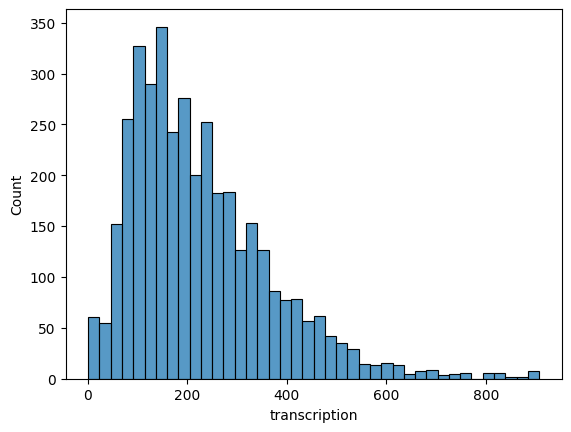

In [ ]:
# Visualize the distribution of word counts

transcription_word_count = df.transcription.str.count(' ') + 1
sns.histplot(x= transcription_word_count )

<Axes: xlabel='keywords', ylabel='Count'>

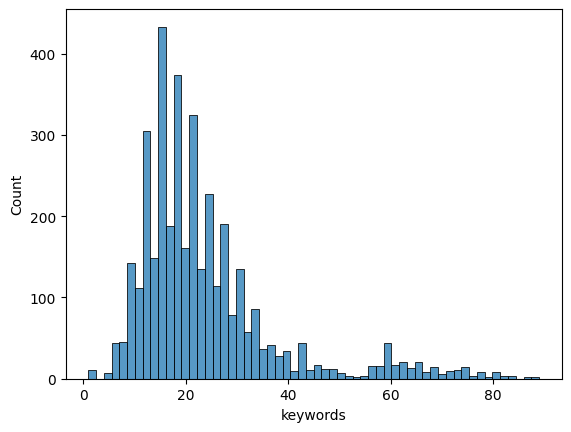

In [ ]:
keywords_word_count = df.keywords.str.count(' ') + 1
sns.histplot(x= keywords_word_count )

In [ ]:
# Fix the maximum length of the transcript
# Fix the maximum keywords length

max_len_transcript = 250
max_len_keywords = 30

In [ ]:
# Add 'start' and 'end' to keywords text

df.keywords = df.keywords.map("[start] {} [end]".format)

In [ ]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,subjective yearold white female presents complaint allergies used allergies lived seattle thinks worse past tried claritin zyrtec worked short time seemed lose effectiveness used allegra also used...,[start] allergy immunology allergic rhinitis allergies asthma nasal sprays rhinitis nasal erythematous allegra sprays allergic [end]
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history difficulty climbing stairs difficulty airline seats tying shoes used public seating lifting objects floor exercises three times week home cardio difficulty walking two blocks ...,[start] bariatrics laparoscopic gastric bypass weight loss programs gastric bypass atkins diet weight watchers body weight laparoscopic gastric weight loss pounds months weight laparoscopic band l...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history present illness seen abc today pleasant gentleman years old pounds bmi overweight ten years since age highest pounds lowest pursuing surgical attempts weight loss feel good get healthy beg...,[start] bariatrics laparoscopic gastric bypass heart attacks body weight pulmonary embolism potential complications sleep study weight loss gastric bypass anastomosis loss sleep laparoscopic gastr...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,mmode left atrial enlargement left atrial diameter cm normal size right left ventricle normal lv systolic function left ventricular ejection fraction normal lv diastolic function pericardial effus...,[start] cardiovascular pulmonary mmode doppler aortic valve atrial enlargement diastolic function ejection fraction mitral mitral valve pericardial effusion pulmonary valve regurgitation systolic ...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,left ventricular cavity size wall thickness appear normal wall motion left ventricular systolic function appears hyperdynamic estimated ejection fraction nearcavity obliteration seen also appears ...,[start] cardiovascular pulmonary doppler echocardiogram annular aortic root aortic valve atrial atrium calcification cavity ejection fraction mitral obliteration outflow regurgitation relaxation p...


### Split data into training and testing set

- test_size=0.1
- random_state=0
- shuffle=True

In [ ]:
# YOUR CODE HERE
idx = np.array(df.index)
np.random.seed(42)
np.random.shuffle(idx)
total = len(idx)
train_cnt = int(total*0.9)
train_idx = idx[0:train_cnt]
test_idx = idx[train_cnt:]
train_idx, test_idx

X_train = df.loc[train_idx].transcription.values
y_train = df.loc[train_idx].keywords.values
X_test = df.loc[test_idx].transcription.values
y_test = df.loc[test_idx].keywords.values

print(len(X_train), len(X_test), len(y_train), len(y_test))

3431 382


In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

3431 382 3431 382


### Tokenization and padding

In [ ]:
# Instantiate tokenizer for transcripts
x_tokenizer = Tokenizer(5000)

# Fit on training data

x_tokenizer.fit_on_texts(X_train)
# Convert transcript sequences into integer sequences for both train and val set

x_train_token = x_tokenizer.texts_to_sequences(X_train)
x_test_token = x_tokenizer.texts_to_sequences(X_test)
# Add zero padding upto maximum length

x_train_pad = pad_sequences(x_train_token, padding='post', maxlen=max_len_transcript, truncating='post')
x_test_pad = pad_sequences(x_test_token, padding='post', maxlen=max_len_transcript, truncating='post')
# x vocab size
x_voc_size = len(x_tokenizer.word_index) +1
x_voc_size

26808

In [ ]:
# Instantiate tokenizer for keywords
y_tokenizer = Tokenizer(5000)

# Fit on training data

y_tokenizer.fit_on_texts(y_train)
# Convert keywords sequences into integer sequences for train and val set

y_train_token = y_tokenizer.texts_to_sequences(y_train)
y_test_token = y_tokenizer.texts_to_sequences(y_test)
# Add zero padding upto maximum length

y_train_pad = pad_sequences(y_train_token, padding='post', maxlen=max_len_keywords+1, truncating='post')
y_test_pad = pad_sequences(y_test_token, padding='post', maxlen=max_len_keywords+1, truncating='post')
# y vocab size
y_voc_size = len(y_tokenizer.word_index) +1
y_voc_size

5881

In [ ]:
type(y_train_pad), print(y_train_pad.shape)

(3431, 31)


(numpy.ndarray, None)

In [ ]:
print(y_tokenizer.word_index['end'])

1


In [ ]:
y_train_pad

array([[   2,  577,  517, ...,    0,    0,    0],
       [   2,  213,  234, ..., 1904,   30,    1],
       [   2,    3,  152, ...,    0,    0,    0],
       ...,
       [   2,   24,  387, ...,    0,    0,    0],
       [   2,   17,    6, ...,    0,    0,    0],
       [   2,  102,  122, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Replace the last token with the token index of 'end' for long sequences

# Apply on Train keywords set

y_train_pad[:,-1][y_train_pad[:,-1]!=0] = y_tokenizer.word_index['end']
# Apply on Validation keywords set

y_test_pad[:,-1][y_test_pad[:,-1]!=0] = y_tokenizer.word_index['end']

### Positional Embedding



In [ ]:
class PositionalEmbedding(layers.Layer):

    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):

        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):

        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):

        return tf.math.not_equal(inputs, 0)

    def get_config(self):

        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config


### Encoder Block


In [ ]:
class TransformerEncoder(layers.Layer):

    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):

        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),
             layers.Dropout(0.1)]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):

        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs)
        proj_input_pre = layers.add([inputs, attention_output])
        proj_input = self.layernorm_1(proj_input_pre)
        proj_output = self.dense_proj(proj_input)
        proj_output_post = layers.add([proj_input ,proj_output])
        return self.layernorm_2(proj_output_post)

    def get_config(self):

        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config


### Decoder Block



In [ ]:
class TransformerDecoder(layers.Layer):

    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):

        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),
             layers.Dropout(0.2)]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def get_config(self):

        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def call(self, inputs, encoder_outputs, mask=None): # two inputs: decoder i/p and encoder o/p

        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            use_causal_mask = True)
        attention_output_1 = self.layernorm_1(layers.add([inputs, attention_output_1]))
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs
        )
        attention_output_2 = self.layernorm_2(layers.add([attention_output_1, attention_output_2]))
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(layers.add([attention_output_2, proj_output]))


### Build Transformer model


In [ ]:
# Create transformer model

embed_dim = 256
dense_dim = 2048
num_heads = 8

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="Transcript")


x = PositionalEmbedding(max_len_transcript, x_voc_size, embed_dim)(encoder_inputs)
x = layers.Dropout(0.1)(x)
for _ in range(2):
  x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
encoder_outputs = x


decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="Keywords")


y = PositionalEmbedding(max_len_keywords, y_voc_size, embed_dim)(decoder_inputs)
y = layers.Dropout(0.1)(y)
for _ in range(4):
  y = TransformerDecoder(embed_dim, dense_dim, num_heads)(y, encoder_outputs)
decoder_outputs = layers.Dense(y_voc_size)(y)

transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
transformer.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Transcript (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_4 (Positi  (None, None, 256)   6926848     ['Transcript[0][0]']             
 onalEmbedding)                                                                                   
                                                                                                  
 Keywords (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 dropout_20 (Dropout)           (None, None, 256)    0           ['positional_embedding_4[0]

## Model Compilation and Training [1 Mark]

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):


    def __init__(self, d_model, warmup_steps=4000):
      super().__init__()

      self.d_model = d_model
      self.d_model = tf.cast(self.d_model, tf.float32)

      self.warmup_steps = warmup_steps

    def __call__(self, step):
      step = tf.cast(step, dtype=tf.float32)
      arg1 = tf.math.rsqrt(step)
      arg2 = step * (self.warmup_steps ** -1.5)

      return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


Text(0.5, 0, 'Train Step')

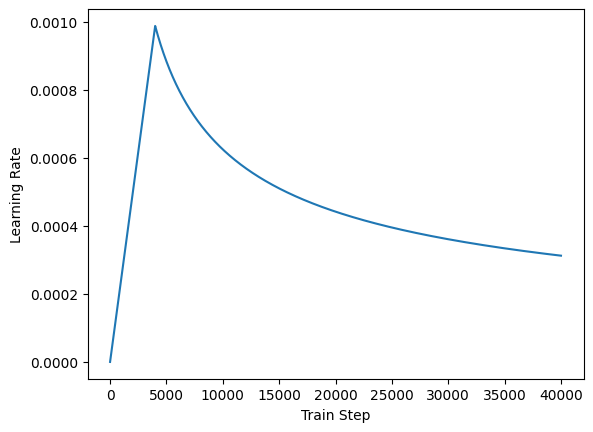

In [ ]:
# Instantiate the Adam optimizer with custom learning rate

learning_rate = CustomSchedule(embed_dim)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.999,
                                     epsilon=1e-6)

plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

**Exercise 14: Set up the loss and metrics**


In [ ]:
def masked_loss(label, pred):

    mask = label != 0
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')
    loss = loss_object(label, pred)

    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask

    loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
    return loss


def masked_accuracy(label, pred):

    pred = tf.argmax(pred, axis=2)
    label = tf.cast(label, pred.dtype)
    match = label == pred

    mask = label != 0

    match = match & mask

    match = tf.cast(match, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(match)/tf.reduce_sum(mask)


In [ ]:
# Compile


transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [ ]:
# Train


transformer.fit([x_train_pad, y_train_pad[:,:-1]], y_train_pad[:,1:], batch_size=64, epochs=50, validation_split=0.1)

Epoch 1/50
49/49 [==============================] - 66s 723ms/step - loss: 8.6564 - masked_accuracy: 0.0164 - val_loss: 8.5033 - val_masked_accuracy: 0.0614
Epoch 2/50
49/49 [==============================] - 32s 661ms/step - loss: 8.3977 - masked_accuracy: 0.0499 - val_loss: 8.2457 - val_masked_accuracy: 0.0614
Epoch 3/50
49/49 [==============================] - 35s 725ms/step - loss: 8.1453 - masked_accuracy: 0.0597 - val_loss: 7.9866 - val_masked_accuracy: 0.0614
Epoch 4/50
49/49 [==============================] - 31s 644ms/step - loss: 7.8726 - masked_accuracy: 0.0614 - val_loss: 7.7080 - val_masked_accuracy: 0.0719
Epoch 5/50
49/49 [==============================] - 32s 648ms/step - loss: 7.5927 - masked_accuracy: 0.0725 - val_loss: 7.4420 - val_masked_accuracy: 0.0801
Epoch 6/50
49/49 [==============================] - 31s 639ms/step - loss: 7.3310 - masked_accuracy: 0.0803 - val_loss: 7.1974 - val_masked_accuracy: 0.0836
Epoch 7/50
49/49 [==============================] - 32s 65

In [ ]:
transformer.evaluate([x_test_pad, y_test_pad[:,:-1]], y_test_pad[:,1:])

12/12 [==============================] - 2s 122ms/step - loss: 1.4764 - masked_accuracy: 0.7677


[1.4763755798339844, 0.7677227854728699]

## Run inference



In [ ]:
def extract_keywords(sentence, transformer=transformer):

    """ Takes an input sentence, and transformer. Returns extracted keywords. """

    # Convert input sentence into integer sequence (Note that tokenizer.texts_to_sequences() take list of text as input)
    ip_tokens = x_tokenizer.texts_to_sequences([sentence])

    # Add zero padding upto maximum length transcription
    ip_tok_seq = pad_sequences(ip_tokens, padding='post', maxlen=max_len_transcript, truncating='post')

    # Create a decoder sequence with 'start' token index
    dec_tok_seq = np.array(y_tokenizer.word_index['start'])

    # Variable to store the output text string
    keyword_sentence = ''

    for i in range(max_len_keywords):

        # Get output logits from transformer
        pred = transformer([ip_tok_seq.reshape(1,-1), dec_tok_seq.reshape(1, -1)], training=False)
        pred = pred[:, -1:, :]

        # Select the index with max value from 'pred' to get the output token index
        token = np.argmax(pred[0])

        # Convert output token to word
        word = y_tokenizer.index_word[token]

        # End loop is word is 'end'

        if word == "end":
          break

        # Append 'token' to dec_tok_seq
        dec_tok_seq = np.append(dec_tok_seq, token)

        # Append 'word' to keyword sentence

        keyword_sentence = keyword_sentence + " " + word

    return keyword_sentence.strip()


In [ ]:
# Predict keywords for a sample input
random_index = np.random.choice(test_idx)
input_sentence = read_data.loc[random_index].transcription
keywords = df.loc[random_index].keywords
pred = extract_keywords(input_sentence)

print(f"Index:{random_index}\nTranscript: \n{input_sentence} \n\nKeywords: \n{keywords} \n\nPredicted Keywords: \n{pred}")

Index:4735
Transcript: 
PREOPERATIVE DIAGNOSIS:,  Posterior mediastinal mass with possible neural foraminal involvement.,POSTOPERATIVE DIAGNOSIS: , Posterior mediastinal mass with possible neural foraminal involvement (benign nerve sheath tumor by frozen section).,OPERATION PERFORMED:,  Left thoracotomy with resection of posterior mediastinal mass.,INDICATIONS FOR PROCEDURE:  ,The patient is a 23-year-old woman who recently presented with a posterior mediastinal mass and on CT and MRI there were some evidence of potential widening of one of the neural foramina.  For this reason, Dr. X and I agreed to operate on this patient together.  Please note that two surgeons were required for this case due to the complexity of it.  The indications and risks of the procedure were explained and the patient gave her informed consent.,DESCRIPTION OF PROCEDURE: , The patient was brought to the operating suite and placed in the supine position.  General endotracheal anesthesia was given with a double l

## Gradio Implementation [OPTIONAL]

Gradio is an open-source python library that allows us to quickly create easy-to-use, customizable UI components for our ML model, any API, or any arbitrary function in just a few lines of code. We can integrate the GUI directly into the Python notebook, or we can share the link with anyone.

In [ ]:
!pip -qq install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 11.2 MB/s eta

In [ ]:
import gradio

In [ ]:
# Input from user
in_transcript = gradio.inputs.Textbox(lines=10, placeholder=None, default="transcription", label='Enter Transcription Text')

# Output prediction
out_keywords = gradio.outputs.Textbox(type="text", label='Extracted Keywords')

In [ ]:
# Gradio interface to generate UI link
iface = gradio.Interface(fn = extract_keywords,
                         inputs = [in_transcript],
                         outputs = [out_keywords])

iface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4fce437ac3615877df.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Click on the link generated above to see UI.